In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [6]:
df.shape

(10002, 14)

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
df.Geography.replace({np.nan:df.Geography.mode()[0]}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11592\3148411476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Geography.replace({np.nan:df.Geography.mode()[0]}, inplace=True)


In [6]:
df.HasCrCard.fillna(0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11592\2908519767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.HasCrCard.fillna(0, inplace=True)


In [7]:
df.IsActiveMember.replace({np.nan:df.IsActiveMember.mode()[0]}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11592\2266045983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.IsActiveMember.replace({np.nan:df.IsActiveMember.mode()[0]}, inplace=True)


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.Age.fillna(df.Age.mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11592\2008360171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10002 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10002 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10002 non-null  float64
 11  IsActiveMember   10002 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705459,0.514997,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.486676,2.891973,62393.474144,0.581639,0.455859,0.499800,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
df.Exited.value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

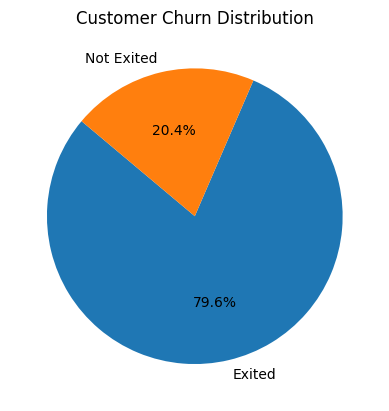

In [13]:
plt.pie(df.Exited.value_counts(), labels=['Exited', 'Not Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Distribution')
plt.show()

In [14]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
gg = df.groupby('Geography')

In [16]:
# Get the France group
france_data = gg.get_group('France')
exit_counts = france_data['Exited'].value_counts()
# Get the Spain group
spain_data = gg.get_group('Spain')
spain_exit_counts = spain_data['Exited'].value_counts()
# Get the Germany group
germany_data = gg.get_group('Germany')
germany_exit_counts = germany_data['Exited'].value_counts()

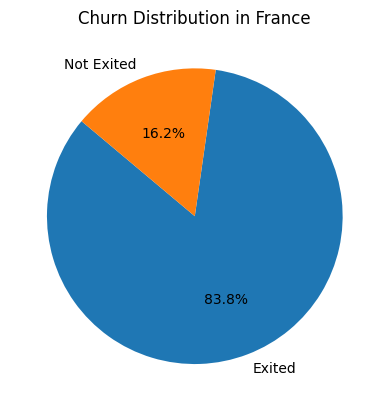

In [17]:
plt.pie(exit_counts, labels=['Exited', 'Not Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution in France')
plt.show()

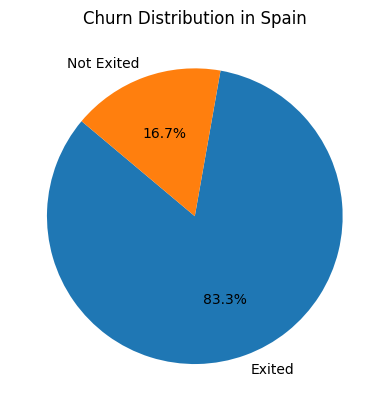

In [18]:
plt.pie(spain_exit_counts, labels=['Exited', 'Not Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution in Spain')
plt.show()

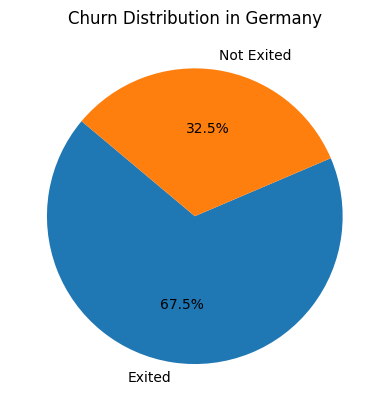

In [19]:
plt.pie(germany_exit_counts, labels=['Exited', 'Not Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution in Germany')
plt.show()

In [20]:
his = df.groupby('Geography').Exited.value_counts()
his

Geography  Exited
France     0         4205
           1          810
Germany    0         1695
           1          815
Spain      0         2064
           1          413
Name: count, dtype: int64

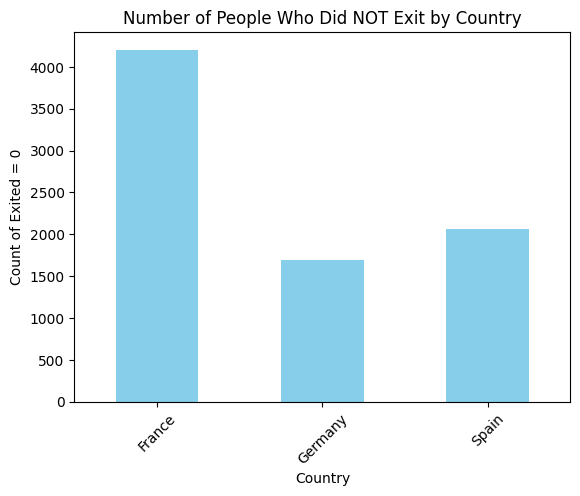

In [21]:
not_exited = his.loc[:, 0]

# Plot histogram (bar plot)
not_exited.plot(kind='bar', color='skyblue')
plt.title('Number of People Who Did NOT Exit by Country')
plt.xlabel('Country')
plt.ylabel('Count of Exited = 0')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,0.0,1.0,79084.10,0


In [24]:
gendis = df.groupby('Gender')['Exited']
gendis.value_counts()

Gender  Exited
Female  0         3405
        1         1139
Male    0         4559
        1          899
Name: count, dtype: int64

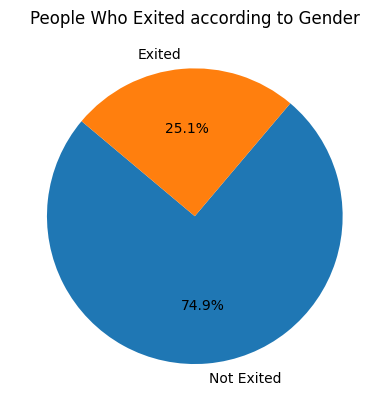

In [25]:
female_exited = gendis.get_group('Female').value_counts()
plt.pie(female_exited, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', startangle=140)
plt.title("People Who Exited according to Gender")
plt.show()

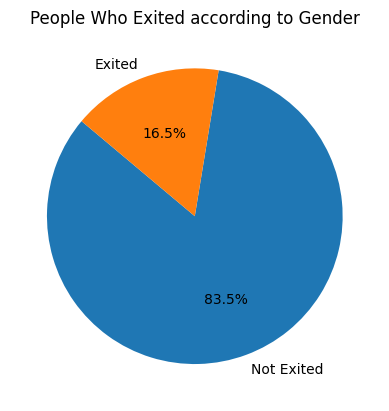

In [26]:
male_exited = gendis.get_group('Male').value_counts()
plt.pie(male_exited, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', startangle=140)
plt.title("People Who Exited according to Gender")
plt.show()

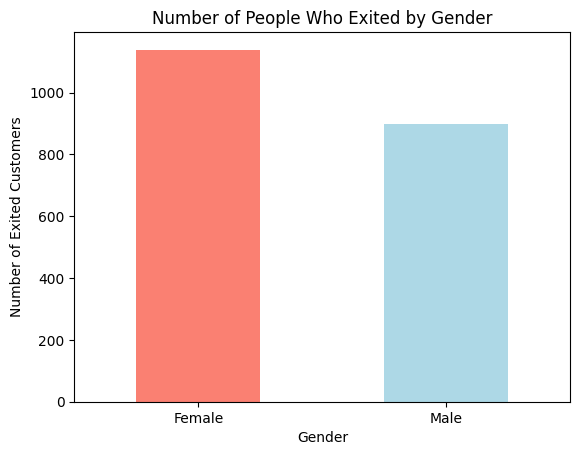

In [27]:
exited_by_gender = df.groupby('Gender')['Exited'].sum()

# Plot bar chart
exited_by_gender.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Number of People Who Exited by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.xticks(rotation=0)
plt.show()

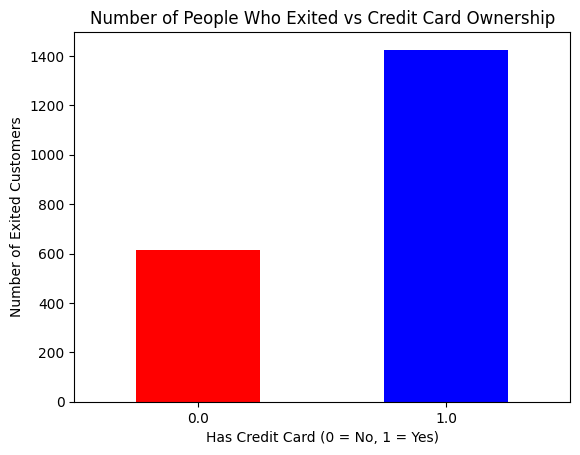

In [28]:
exited_by_card = df.groupby('HasCrCard')['Exited'].sum()

# Plot bar chart
exited_by_card.plot(kind='bar', color=['red', 'blue'])
plt.title('Number of People Who Exited vs Credit Card Ownership')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Number of Exited Customers')
plt.xticks(rotation=0)
plt.show()

In [29]:
exited = df.groupby('HasCrCard')['Exited'].value_counts()
exited

HasCrCard  Exited
0.0        0         2333
           1          613
1.0        0         5631
           1         1425
Name: count, dtype: int64

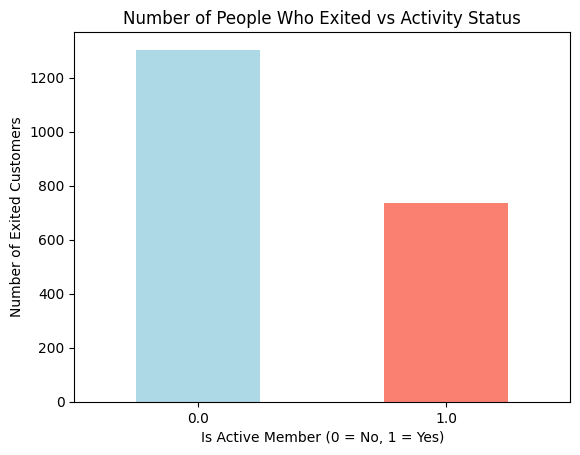

In [30]:
exited_by_activity = df.groupby('IsActiveMember')['Exited'].sum()

# Plot bar chart
exited_by_activity.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Number of People Who Exited vs Activity Status')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Number of Exited Customers')
plt.xticks(rotation=0)
plt.show()

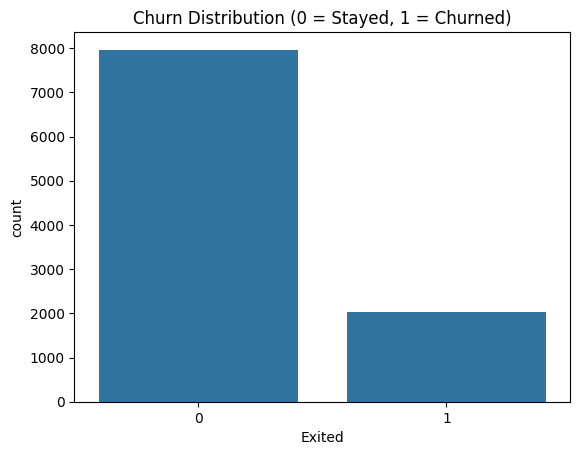

In [31]:
# Count values of target variable
df['Exited'].value_counts()

# Plot class distribution
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution (0 = Stayed, 1 = Churned)")
plt.show()


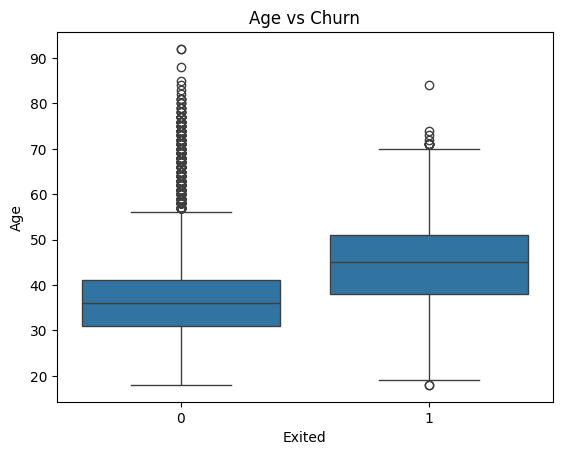

In [32]:
sns.boxplot(data=df, x='Exited', y='Age')
plt.title("Age vs Churn")
plt.show()

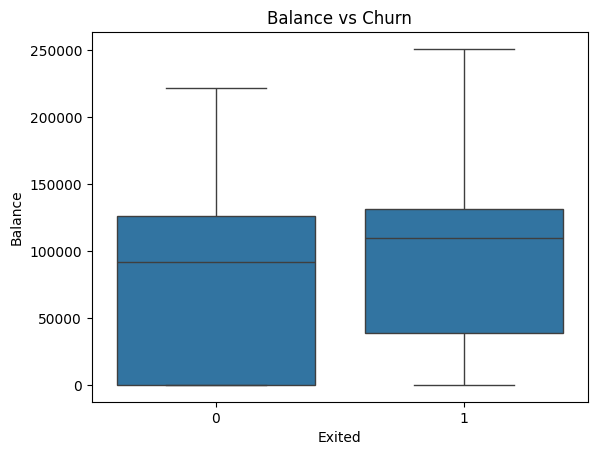

In [33]:
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title("Balance vs Churn")
plt.show()

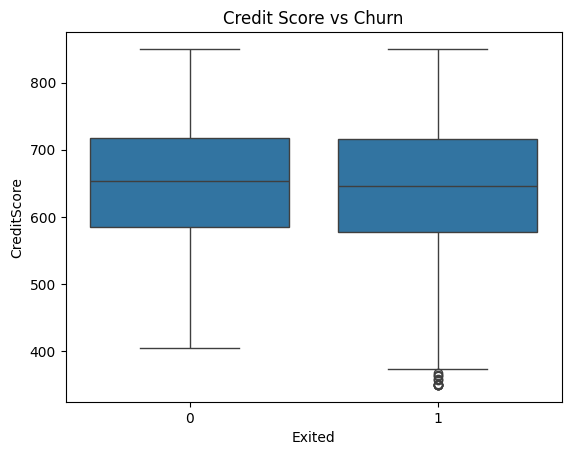

In [34]:
sns.boxplot(data=df, x='Exited', y='CreditScore')
plt.title("Credit Score vs Churn")
plt.show()

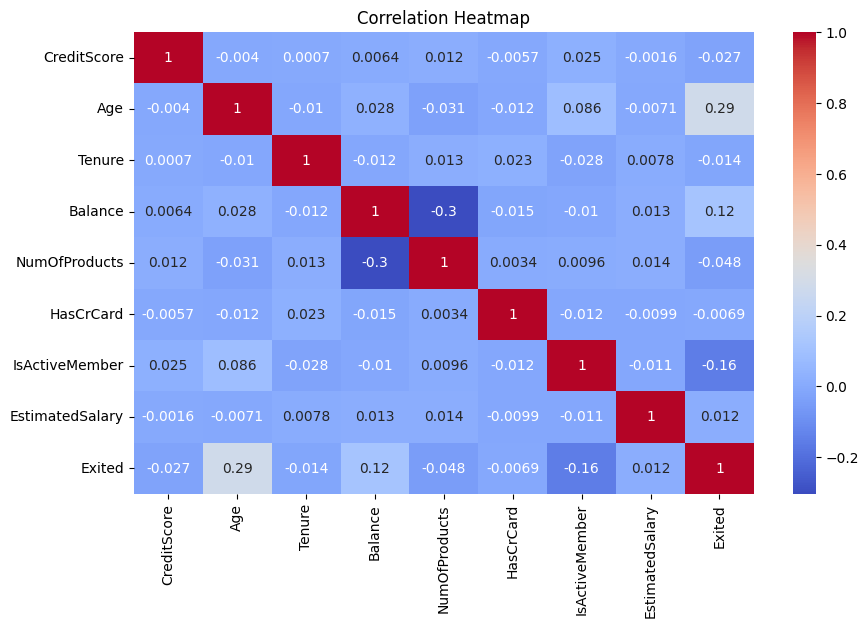

In [35]:
numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

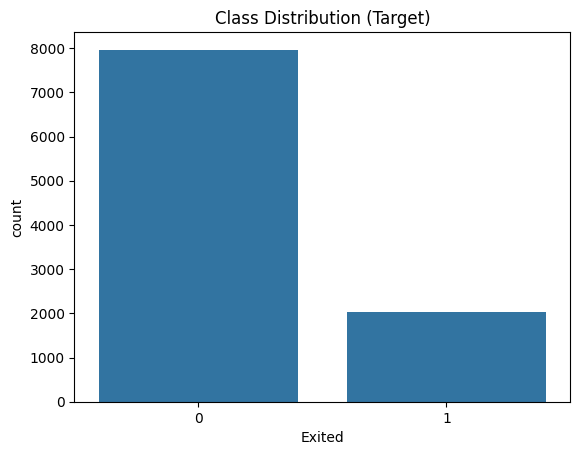

In [36]:
sns.countplot(x='Exited', data=df)
plt.title("Class Distribution (Target)")
plt.show()

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,0.0,1.0,79084.10,0


In [38]:
df.to_csv("clean_churn_data.csv", index=False)